In [1]:
hello_rules =  """
    say_hello = names hello tail
    names = name names | name
    name = Jhon | Mike | 老梁
    hello = 你好 | 您来了 | 快请进
    tail = 呀 | !
"""

In [100]:
def get_generate_by_grammar(grammar_str,target,stmt_split='=',or_split='|'):
    rules = dict() #key is the @statement,value is @expression
    for line in grammar_str.split('\n'):
        if not line:continue
        # skip the empty line
        stmt,expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.split(or_split)
#         print(rules)
    return generate(rules,target)



In [82]:
def generate(grammar_rule,target):
    if target in grammar_rule:
        candidates = grammar_rule[target]
        candidate = random.choice(candidates).strip().split(' ')
        return " ".join(generate(grammar_rule,target=c) for c in candidate)
        print('s')
    else:
        return target

In [83]:
get_generate_by_grammar(hello_rules,'say_hello')

'Jhon 快请进 呀'

In [98]:
simple_grammar = """
sentence => noun phrase verb_phrase 
noun_phrase => Article Adj* noun 
Adj* => null | Adj Adj* 
verb_phrase => verb noun_phrase
Article => ⼀个 | 这个
noun => ⼥⼈ | 篮球 | 桌⼦ | ⼩猫
verb => 看着 | 坐在 | 听着 | 看⻅
Adj => 蓝⾊的 | 好看的 | ⼩⼩的
"""

In [101]:
get_generate_by_grammar(simple_grammar,target='sentence',stmt_split='=>')

'⼩猫 phrase 听着 这个 好看的 蓝⾊的 蓝⾊的 null ⼩猫'

# language model

#input:Sentence(w1...wn)
#output:Probability(0,1)

$$ pr(sentence) = pr(w_1 \cdot w_2 \cdot w_n) = \prod \frac{count(w_i,w_{i+1})}{count(w_i)} $$

In [4]:
corpus = r'D:\art.txt'
file = open(corpus).read()
len(file)

59547

In [6]:
import random
def generate_by_pro(text_corpus,length=20):
    return random.sample(text_corpus,length)
generate_by_pro(file)

['惕',
 '之',
 '盘',
 '象',
 '剧',
 '者',
 '定',
 '有',
 '记',
 '在',
 '跌',
 '上',
 '生',
 '银',
 '爱',
 '过',
 '维',
 '英',
 '往',
 '龙']

In [12]:
from collections import Counter

words_count = Counter(file)

words_with_fre = [f for w,f in words_count.most_common()]

words_count.most_common(10)

[('的', 1797),
 ('一', 565),
 ('在', 543),
 ('0', 541),
 ('1', 504),
 ('是', 420),
 ('中', 408),
 ('人', 382),
 ('了', 380),
 ('2', 374)]

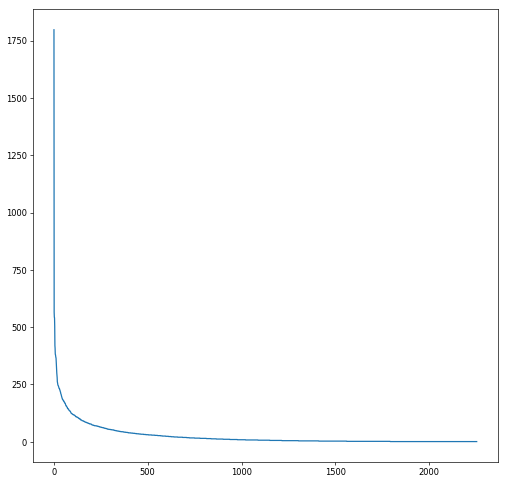

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10),dpi=60)
plt.plot(words_with_fre)
plt.show()

In [2]:
import jieba

In [16]:
tokens = list(jieba.cut(file))

In [18]:
_2_gram_words = [
    tokens[i] + tokens[i+1] for i in range(len(tokens)-1)
]

_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [34]:
_2_gram_word_count = Counter(_2_gram_words)

In [46]:
def get_gram_count(word,wc):
    if word in wc:return wc[word]
    else:
        return wc.most_common()[-1][-1]
get_gram_count('xxx',words_count)

1

In [49]:
 def two_gram_model(sentence):
        tokens = list(jieba.cut(sentence))
        
        probability = 1
        
        for i in range(len(tokens)-1):
            first_word = tokens[i]
            next_word = tokens[i+1]
            
            two_word_count = get_gram_count(first_word+next_word,_2_gram_word_count)
            next_word_count = get_gram_count(next_word,words_count)
            
            pro = two_word_count / next_word_count 
            
            probability *= pro
            
        return probability

In [50]:
two_gram_model('前天早上吃')

0.14285714285714285

In [51]:
two_gram_model('我明天要上班')

0.005917159763313609

In [52]:
two_gram_model('上吃')

0.14285714285714285